exp\fedmm_fedmm_dann_on_fedmm_mnistm_lr0.01_lstep20\sub_exp_20251212102402\eval_results.log
exp\fedavg_fedmm_dann_on_fedmm_mnistm_lr0.01_lstep20\sub_exp_20251212102427\eval_results.log

In [1]:
import ast
from pathlib import Path

# Parse log files and cache accuracy/loss trajectories
log_paths = {
    "FedMM + DANN": Path(r"exp\fedmm_fedmm_dann_on_fedmm_mnistm_lr0.01_lstep20\sub_exp_20251212102402\eval_results.log"),
    "FedAvg-FedMM + DANN": Path(r"exp\fedavg_fedmm_dann_on_fedmm_mnistm_lr0.01_lstep20\sub_exp_20251212102427\eval_results.log"),
}

def load_metrics(log_file: Path):
    rounds, accs, losses = [], [], []
    with log_file.open("r", encoding="utf-8") as f:
        for raw_line in f:
            raw_line = raw_line.strip()
            if not raw_line:
                continue
            record = ast.literal_eval(raw_line)
            rounds.append(record["Round"])
            results = record["Results_raw"]
            accs.append(results["test_acc"])
            losses.append(results["test_avg_loss"])
    return {"rounds": rounds, "acc": accs, "loss": losses}

metrics = {label: load_metrics(path) for label, path in log_paths.items()}


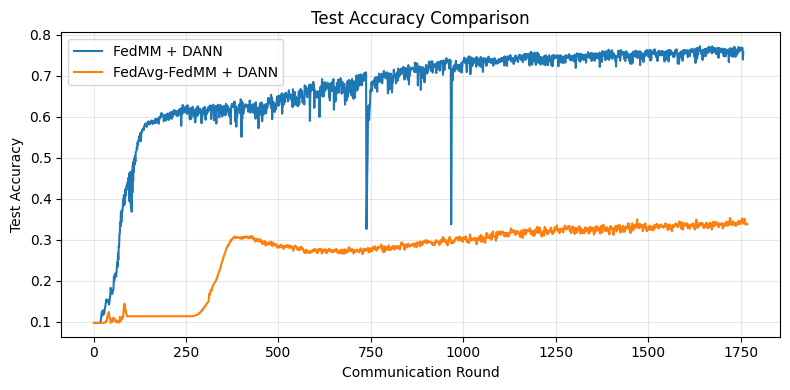

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
for label, data in metrics.items():
    plt.plot(data["rounds"], data["acc"], label=label)
plt.xlabel("Communication Round")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


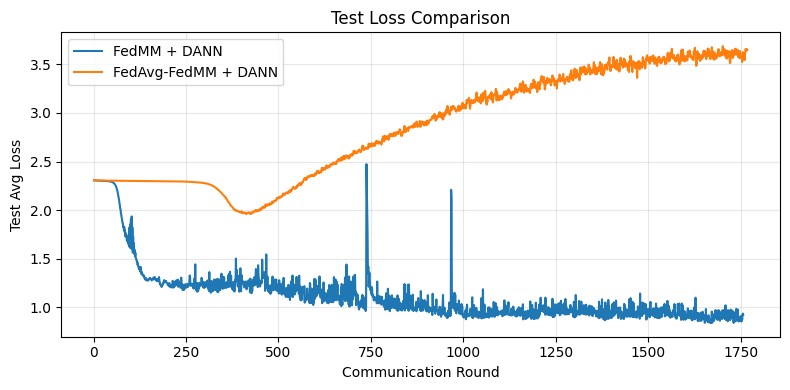

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
for label, data in metrics.items():
    plt.plot(data["rounds"], data["loss"], label=label)
plt.xlabel("Communication Round")
plt.ylabel("Test Avg Loss")
plt.title("Test Loss Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
